In [1]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import os

In [3]:
plt.rcParams['figure.figsize'] = [16, 8]

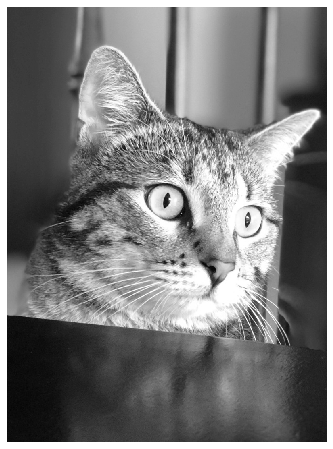

In [20]:
A = image.imread('cat_rec.jpg')
X = np.mean(A, -1) # to grayscale

plt.figure()
plt.imshow(X, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [21]:
# economy SVD
U, s, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(s)

In [25]:
print(U.shape, S.shape, VT.shape)

(1080, 793) (793, 793) (793, 793)


(1080, 5) (5, 5) (5, 793)


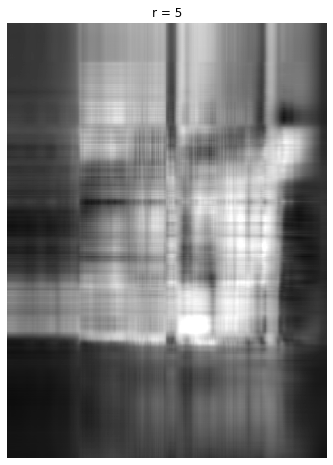

(1080, 20) (20, 20) (20, 793)


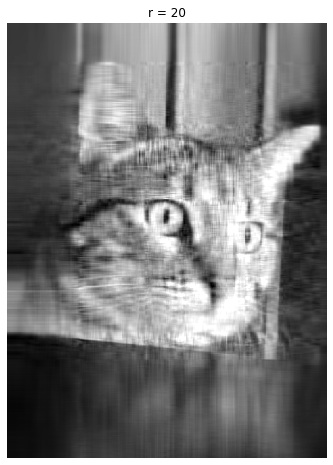

(1080, 100) (100, 100) (100, 793)


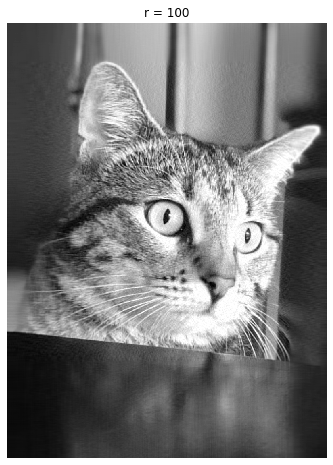

(1080, 300) (300, 300) (300, 793)


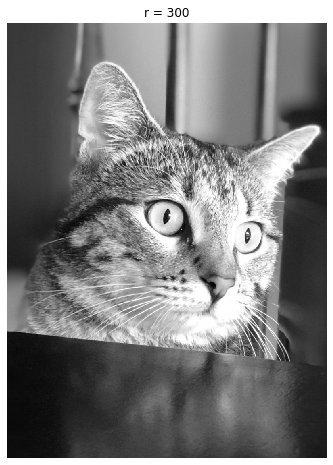

In [27]:
j = 1
for r in (5, 20, 100, 300):
    Xtilde = U[:,:r] @ S[0:r, :r] @VT[:r,:]
    plt.figure(j)
    j += 1
    print(U[:,:r].shape, S[0:r, :r].shape, VT[:r,:].shape)
    plt.imshow(Xtilde, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(f'r = {r}')
    plt.show()

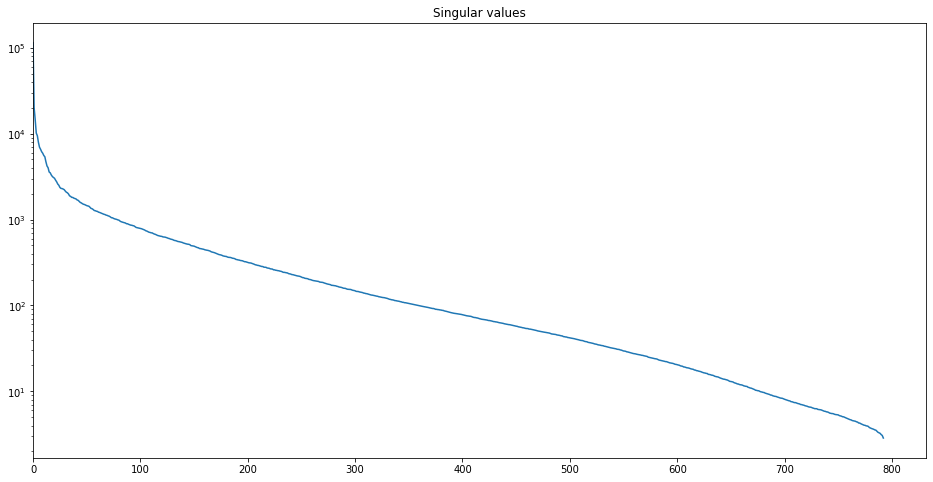

In [31]:
plt.figure()
plt.semilogy(s)
plt.title('Singular values')
plt.xlim(left=0)
plt.show()

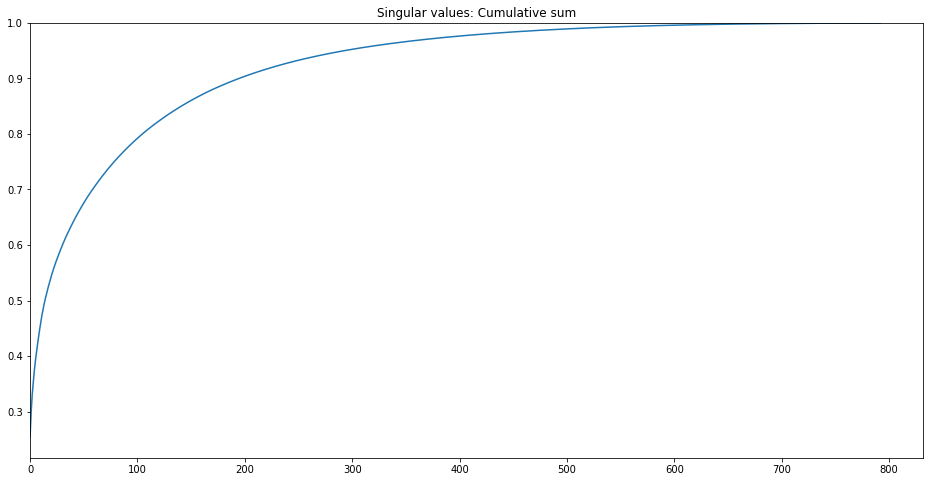

In [33]:
plt.figure()
plt.plot(np.cumsum(s/np.sum(s)))  # cumulative sum
plt.title('Singular values: Cumulative sum')
plt.ylim(top=1)
plt.xlim(left=0)
plt.show()